
✅ Accuracy Score: 0.9268

📋 Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.95      0.93       198
    Positive       0.95      0.90      0.93       198

    accuracy                           0.93       396
   macro avg       0.93      0.93      0.93       396
weighted avg       0.93      0.93      0.93       396



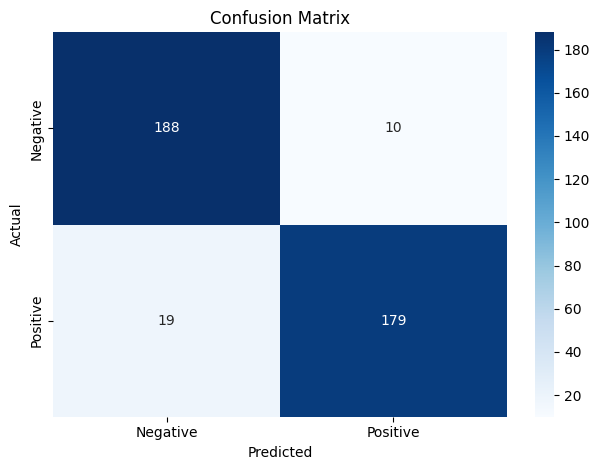

In [4]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset - 'rec.autos' vs 'sci.med' (as sentiment proxy)
categories = ['rec.autos', 'sci.med']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Step 2: Prepare DataFrame
df = pd.DataFrame({'text': data.data, 'target': data.target})
df['target'] = df['target'].map({0: "Negative", 1: "Positive"})  # map targets

# Step 3: Drop empty rows
df.dropna(inplace=True)

# Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['text'])
y = df['target']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate
y_pred = model.predict(X_test)

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Negative", "Positive"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()